<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/004(Understanding_Convolution_and_Pooling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import ascent

In [4]:
base_image=ascent()
base_image.shape

(512, 512)

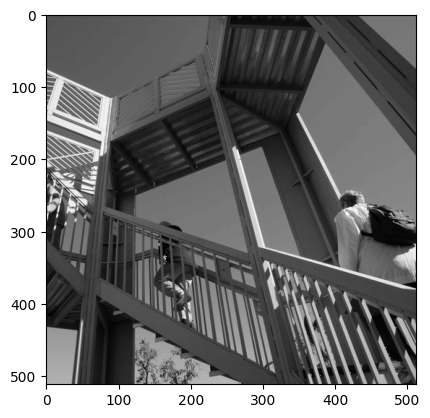

In [7]:
plt.imshow(base_image)
plt.gray()

###Convolution Operation

In [9]:
#Make a copy for Transformation Process
t_img=np.copy(base_image)
t_img.shape

(512, 512)

In [11]:
#Filters: 3*3
filters=[[-1, -2, -1],
         [0, 0, 0],
         [1, 2, 1]]
#Image Shape
width=t_img.shape[0]
height=t_img.shape[1]

In [12]:
#Applying Filter
for w in range(1, width-1):
  for h in range(1, height-1):
    convolution=0
    #First column
    convolution=convolution+t_img[w-1][h-1]*filters[0][0]
    convolution=convolution+t_img[w-1][h]*filters[0][1]
    convolution=convolution+t_img[w-1][h+1]*filters[0][2]
    #Second column
    convolution=convolution+t_img[w][h-1]*filters[1][0]
    convolution=convolution+t_img[w][h]*filters[1][1]
    convolution=convolution+t_img[w][h+1]*filters[1][2]
    #Third column
    convolution=convolution+t_img[w+1][h-1]*filters[2][0]
    convolution=convolution+t_img[w+1][h]*filters[2][1]
    convolution=convolution+t_img[w+1][h+1]*filters[2][2]

    #If convolution exceeds or went -ve
    if(convolution>255):
      convolution=255.0
    elif(convolution<0):
      convolution=0.0
    #updating the pexels
    t_img[w][h]=convolution

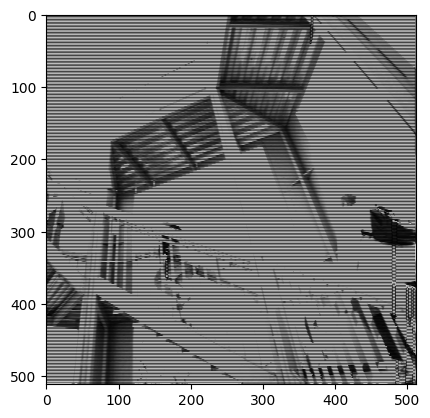

In [13]:
plt.imshow(t_img)
plt.gray()

###Pooling Operation

In [16]:
#Applying MaxPooling with filter size=(2,2) and stride(2,2). This means 512 image will be reduced to 512/2=256
stride=2
new_img=np.zeros(shape=(int(width/2), int(height/2)))
for w in range(0, width, stride):
  for h in range(0, height, stride):
    pooling=[]
    #Extract 4 blocks
    pooling.append(t_img[w][h])
    pooling.append(t_img[w][h+1])
    pooling.append(t_img[w+1][h])
    pooling.append(t_img[w+1][h+1])
    #Find max value
    new_img[int(w/2)][int(h/2)]=max(pooling)

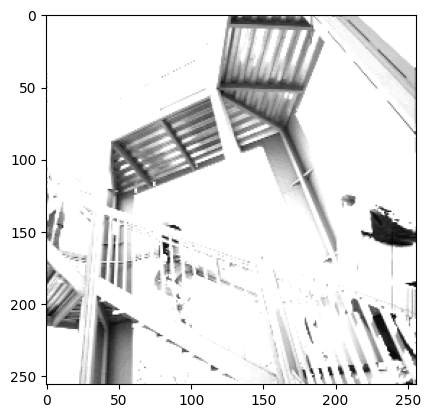

In [17]:
plt.imshow(new_img)
plt.gray()

####Observation:
1. After applying pooling layer, the size of the image has been reduced.
2. But the features remained

Text(0.5, 1.0, 'Pooling Image')

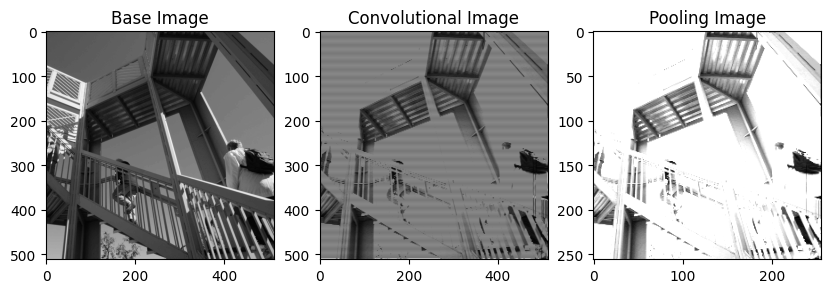

In [21]:
row=1
cols=3
plt.figure(figsize=(10,7))

plt.subplot(row, cols,1)
plt.imshow(base_image)
plt.title("Base Image")

plt.subplot(row, cols, 2)
plt.imshow(t_img)
plt.title("Convolutional Image")

plt.subplot(row, cols, 3)
plt.imshow(new_img)
plt.title("Pooling Image")